# definition 2

In [11]:
from keras.preprocessing.text import Tokenizer
import codecs
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import nltk
from konlpy.tag import Okt
from tqdm import tqdm

# train set
name = "2"
filename1 = './spy/spy/definition'+name+'_spynorth_scaling_trust.txt'
filename2 = './spy/spy/definition'+name+'_spynorth_scaling_untrust.txt'


with codecs.open(filename1, 'r', encoding='utf-8') as f:
    lines1 = f.readlines()
with codecs.open(filename2, 'r', encoding='utf-8') as f:
    lines2 = f.readlines()




# test set


with codecs.open('./spy/spy/definition'+name+'_spynorth_test_t.txt', 'r', 'utf-8') as f:
    test1 = f.readlines()
with codecs.open('./spy/spy/definition'+name+'_spynorth_test_ut.txt', 'r', 'utf-8') as f:
    test2 = f.readlines()


    



## movie 1

In [12]:
lines_t = lines1[:4560]
lines_ut = lines2[:4560]
test_t = test1[:1140]
test_ut = test2[:1140]

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 2280/2280 [08:02<00:00,  4.72it/s]


### simpleRNN

Epoch 1/10
57/57 [==============================] - 21s 283ms/step - loss: 0.6668 - acc: 0.6149 - val_loss: 0.9987 - val_acc: 0.0000e+00
Epoch 2/10
57/57 [==============================] - 14s 247ms/step - loss: 0.6239 - acc: 0.6531 - val_loss: 0.9870 - val_acc: 0.0389
Epoch 3/10
57/57 [==============================] - 14s 244ms/step - loss: 0.5223 - acc: 0.7791 - val_loss: 1.1244 - val_acc: 0.1162
Epoch 4/10
57/57 [==============================] - 14s 241ms/step - loss: 0.3801 - acc: 0.8840 - val_loss: 1.0849 - val_acc: 0.2785
Epoch 5/10
57/57 [==============================] - 15s 263ms/step - loss: 0.2348 - acc: 0.9522 - val_loss: 1.2701 - val_acc: 0.2862
Epoch 6/10
57/57 [==============================] - 14s 253ms/step - loss: 0.1193 - acc: 0.9831 - val_loss: 1.3038 - val_acc: 0.3728
Epoch 7/10
57/57 [==============================] - 15s 261ms/step - loss: 0.0582 - acc: 0.9949 - val_loss: 1.5270 - val_acc: 0.3344
Epoch 8/10
57/57 [==============================] - 14s 238ms/ste

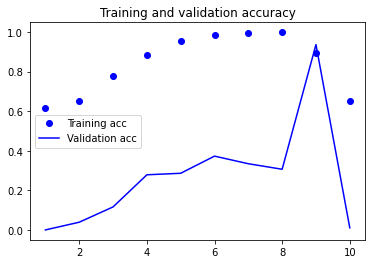

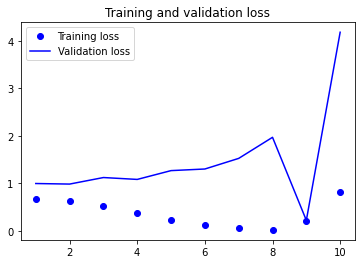

72/72 [==============================] - 2s 33ms/step - loss: 1.9330 - acc: 0.4820


[1.9329506158828735, 0.48201754689216614]

In [13]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
57/57 [==============================] - 38s 575ms/step - loss: 0.6639 - acc: 0.6231 - val_loss: 0.9736 - val_acc: 0.0000e+00
Epoch 2/10
57/57 [==============================] - 30s 536ms/step - loss: 0.6261 - acc: 0.6358 - val_loss: 1.0358 - val_acc: 0.1135
Epoch 3/10
57/57 [==============================] - 31s 550ms/step - loss: 0.5727 - acc: 0.7175 - val_loss: 0.8515 - val_acc: 0.4803
Epoch 4/10
57/57 [==============================] - 31s 547ms/step - loss: 0.5101 - acc: 0.7656 - val_loss: 0.6979 - val_acc: 0.6765
Epoch 5/10
57/57 [==============================] - 31s 553ms/step - loss: 0.4686 - acc: 0.7856 - val_loss: 1.1883 - val_acc: 0.3777
Epoch 6/10
57/57 [==============================] - 31s 535ms/step - loss: 0.4209 - acc: 0.8176 - val_loss: 1.1206 - val_acc: 0.4731
Epoch 7/10
57/57 [==============================] - 31s 542ms/step - loss: 0.3829 - acc: 0.8410 - val_loss: 1.2777 - val_acc: 0.3273
Epoch 8/10
57/57 [==============================] - 31s 538ms/ste

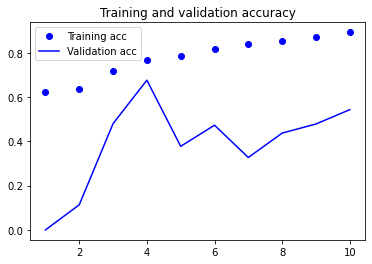

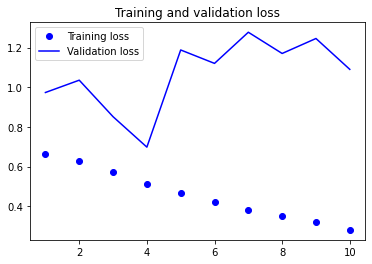

72/72 [==============================] - 5s 62ms/step - loss: 1.0670 - acc: 0.5105


[1.0670394897460938, 0.5105262994766235]

In [14]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## movie 2

In [15]:
lines_t = lines1[:3760]
lines_ut = lines2[:3760]
test_t = test1[:940]
test_ut = test2[:940]

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 1880/1880 [08:04<00:00,  3.88it/s]


### simpleRNN

Epoch 1/10
47/47 [==============================] - 21s 296ms/step - loss: 0.6659 - acc: 0.6144 - val_loss: 0.9428 - val_acc: 0.0040
Epoch 2/10
47/47 [==============================] - 11s 233ms/step - loss: 0.5945 - acc: 0.6905 - val_loss: 0.9648 - val_acc: 0.1529
Epoch 3/10
47/47 [==============================] - 11s 224ms/step - loss: 0.4658 - acc: 0.8314 - val_loss: 0.8907 - val_acc: 0.3677
Epoch 4/10
47/47 [==============================] - 11s 228ms/step - loss: 0.3429 - acc: 0.9044 - val_loss: 0.4928 - val_acc: 0.8211
Epoch 5/10
47/47 [==============================] - 11s 228ms/step - loss: 0.3520 - acc: 0.8728 - val_loss: 0.8836 - val_acc: 0.4834
Epoch 6/10
47/47 [==============================] - 11s 226ms/step - loss: 0.1790 - acc: 0.9722 - val_loss: 1.1070 - val_acc: 0.4043
Epoch 7/10
47/47 [==============================] - 11s 226ms/step - loss: 0.1223 - acc: 0.9777 - val_loss: 1.0878 - val_acc: 0.4415
Epoch 8/10
47/47 [==============================] - 10s 216ms/step - 

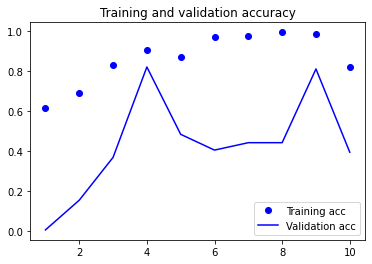

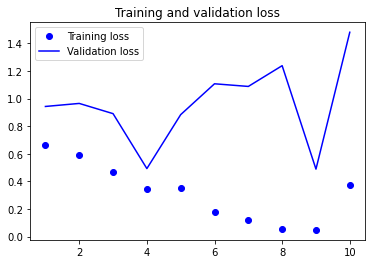

59/59 [==============================] - 2s 26ms/step - loss: 1.1164 - acc: 0.5239


[1.1163523197174072, 0.5239361524581909]

In [16]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
47/47 [==============================] - 29s 511ms/step - loss: 0.6640 - acc: 0.6197 - val_loss: 0.9059 - val_acc: 0.0000e+00
Epoch 2/10
47/47 [==============================] - 24s 503ms/step - loss: 0.6305 - acc: 0.6333 - val_loss: 0.9142 - val_acc: 0.0785
Epoch 3/10
47/47 [==============================] - 23s 486ms/step - loss: 0.5766 - acc: 0.7021 - val_loss: 0.9653 - val_acc: 0.2906
Epoch 4/10
47/47 [==============================] - 23s 488ms/step - loss: 0.5223 - acc: 0.7610 - val_loss: 0.8894 - val_acc: 0.4668
Epoch 5/10
47/47 [==============================] - 23s 490ms/step - loss: 0.4588 - acc: 0.7969 - val_loss: 0.7201 - val_acc: 0.6722
Epoch 6/10
47/47 [==============================] - 23s 483ms/step - loss: 0.4016 - acc: 0.8258 - val_loss: 1.1062 - val_acc: 0.4734
Epoch 7/10
47/47 [==============================] - 24s 504ms/step - loss: 0.3641 - acc: 0.8476 - val_loss: 1.0718 - val_acc: 0.5007
Epoch 8/10
47/47 [==============================] - 23s 483ms/ste

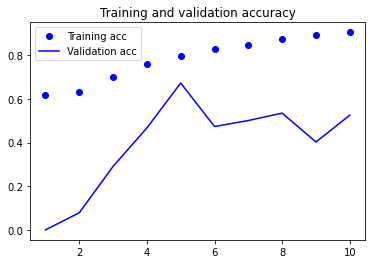

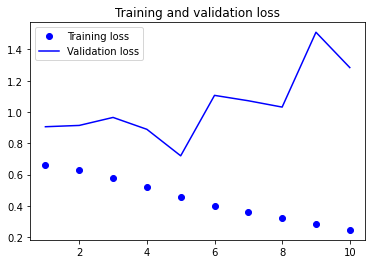

59/59 [==============================] - 4s 63ms/step - loss: 1.1020 - acc: 0.5239


[1.1020498275756836, 0.5239361524581909]

In [17]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## movie3

In [18]:
lines_t = lines1[:2960]
lines_ut = lines2[:2960]
test_t = test1[:740]
test_ut = test2[:740]

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 1480/1480 [07:21<00:00,  3.35it/s]


### simpleRNN

Epoch 1/10
37/37 [==============================] - 15s 243ms/step - loss: 0.6677 - acc: 0.6201 - val_loss: 1.0481 - val_acc: 0.0000e+00
Epoch 2/10
37/37 [==============================] - 7s 196ms/step - loss: 0.6096 - acc: 0.6725 - val_loss: 1.0033 - val_acc: 0.0811
Epoch 3/10
37/37 [==============================] - 7s 203ms/step - loss: 0.4833 - acc: 0.8247 - val_loss: 0.9440 - val_acc: 0.2559
Epoch 4/10
37/37 [==============================] - 7s 197ms/step - loss: 0.3425 - acc: 0.9191 - val_loss: 0.9048 - val_acc: 0.4122
Epoch 5/10
37/37 [==============================] - 7s 199ms/step - loss: 0.2890 - acc: 0.9198 - val_loss: 0.9148 - val_acc: 0.4383
Epoch 6/10
37/37 [==============================] - 7s 198ms/step - loss: 0.1751 - acc: 0.9730 - val_loss: 1.2354 - val_acc: 0.3133
Epoch 7/10
37/37 [==============================] - 7s 198ms/step - loss: 0.1108 - acc: 0.9861 - val_loss: 1.2022 - val_acc: 0.3860
Epoch 8/10
37/37 [==============================] - 7s 193ms/step - los

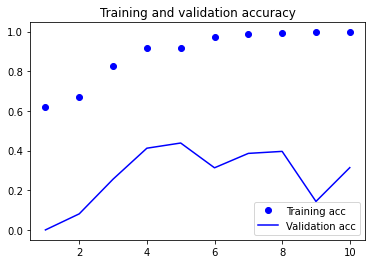

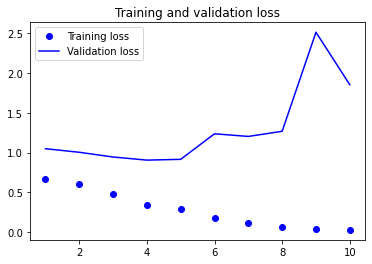

47/47 [==============================] - 2s 52ms/step - loss: 1.2404 - acc: 0.5041


[1.2404261827468872, 0.504054069519043]

In [19]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
37/37 [==============================] - 22s 498ms/step - loss: 0.6660 - acc: 0.6212 - val_loss: 0.9581 - val_acc: 0.0000e+00
Epoch 2/10
37/37 [==============================] - 17s 473ms/step - loss: 0.6316 - acc: 0.6277 - val_loss: 1.0325 - val_acc: 0.0346
Epoch 3/10
37/37 [==============================] - 17s 467ms/step - loss: 0.5805 - acc: 0.6915 - val_loss: 0.9577 - val_acc: 0.2694
Epoch 4/10
37/37 [==============================] - 17s 472ms/step - loss: 0.5124 - acc: 0.7774 - val_loss: 1.1065 - val_acc: 0.4096
Epoch 5/10
37/37 [==============================] - 17s 470ms/step - loss: 0.4566 - acc: 0.8057 - val_loss: 0.8393 - val_acc: 0.5777
Epoch 6/10
37/37 [==============================] - 17s 468ms/step - loss: 0.3859 - acc: 0.8438 - val_loss: 0.8678 - val_acc: 0.6394
Epoch 7/10
37/37 [==============================] - 17s 472ms/step - loss: 0.3423 - acc: 0.8653 - val_loss: 1.0884 - val_acc: 0.5448
Epoch 8/10
37/37 [==============================] - 17s 473ms/ste

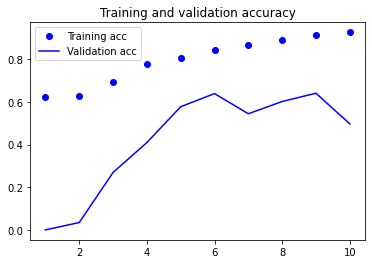

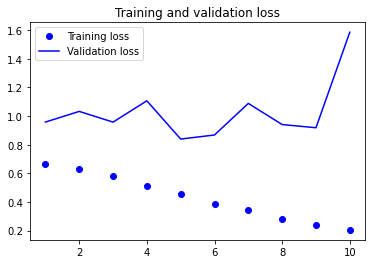

47/47 [==============================] - 3s 60ms/step - loss: 1.2939 - acc: 0.5054


[1.293870210647583, 0.5054054260253906]

In [20]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

# definition 2